
## Created on Mon Dec 21 12:07:28 2020

### author: Elliott Stokes

### References:
* https://www.kaggle.com/fabiendaniel/predicting-flight-delays-tutorial

This file will deal with the preprocessing of the data including:
* cleaning
* Dealing with missing values
* Validating datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import floor, e
import os
import re

dataset = pd.DataFrame()

for location in os.listdir('../DataSets'):
    print(location)
    for filename in os.listdir('../DataSets/{}'.format(location)):
        if filename.endswith('.csv'):
            print(filename)
            df = pd.read_csv('../DataSets/{}/{}'.format(location, filename), encoding= 'unicode_escape')
            
            # Rename the columns with inconsistencies and padding
            amountColName = [col for col in df.columns if 'Amount' in col]
            df = df.rename(columns={'Expense area': 'Expense Area',
                                    'Expense type': 'Expense Type',
                                    amountColName[0]: 'Amount'})
            
            # Convert the date column to the pandas datetime format
            df['Date'] = pd.to_datetime(df.Date)
            
            # Convert the Amount column to type float
            df['Amount'] = df['Amount'].astype(str)
            for symbol in [',', '£', '(', ')']:
                df['Amount'] = df['Amount'].str.replace(symbol, '', regex = True)
            df['Amount'] = df['Amount'].astype(float)
            
            # Add source location to dataframe
            df['Group'] = location
            _entity = df['Entity'][0]
            if _entity.startswith('0'):
                df['Entity'] = df['Entity'].map({'03K': 'NHS North Lincolnshire CCG', '03F': 'NHS Hull CCG'})
            
            dataset = dataset.append(df[['Date', 'Group', 'Entity', 'Expense Type', 'Expense Area', 'Supplier', 'Amount']], ignore_index = True)
            
print('dataset dimensions:', dataset.shape)

ENHERTS
06k-25k-spend-August-201516.csv
06k-25k-spend-for-April-201617.csv
06k-25k-spend-for-april-201718.csv
06k-25k-spend-for-april-201819.csv
06k-25k-spend-for-april-201920.csv
06K-25k-spend-for-april-202021.csv
06k-25k-spend-for-august-201617.csv
06k-25k-spend-for-august-201718.csv
06k-25k-spend-for-august-201819.csv
06K-25k-spend-for-august-201920.csv
06K-25k-spend-for-august-202021.csv
06k-25k-spend-for-December-201516.csv
06k-25k-spend-for-December-201617.csv
06k-25k-spend-for-december-201718.csv
06k-25k-spend-for-december-201819.csv
06K-25k-spend-for-december-201920.csv
06K-25k-spend-for-december-202021.csv
06k-25k-spend-for-February-201516.csv
06k-25k-spend-for-February-201617.csv
06k-25k-spend-for-february-201718.csv
06K-25k-spend-for-february-201920.csv
06k-25k-spend-for-febuary-201819.csv
06k-25k-spend-for-January-201516.csv
06k-25k-spend-for-January-201617.csv
06k-25k-spend-for-january-201718.csv
06k-25k-spend-for-january-201819.csv
06K-25k-spend-for-january-201920.csv
06K

STKPRT-Mar-2016.csv
STKPRT-Mar-2017.csv
STKPRT-Mar-2018.csv
STKPRT-Mar-2020.csv
STKPRT-May-2013.csv
STKPRT-May-2014.csv
STKPRT-May-2015.csv
STKPRT-May-2016.csv
STKPRT-May-2017.csv
STKPRT-May-2018.csv
STKPRT-May-2019.csv
STKPRT-May-2020.csv
STKPRT-Nov-2013.csv
STKPRT-Nov-2014.csv
STKPRT-Nov-2015.csv
STKPRT-Nov-2016.csv
STKPRT-Nov-2017.csv
STKPRT-Nov-2018.csv
STKPRT-Nov-2019.csv
STKPRT-Nov-2020.csv
STKPRT-Oct-2013.csv
STKPRT-Oct-2014.csv
STKPRT-Oct-2015.csv
STKPRT-Oct-2016.csv
STKPRT-Oct-2017.csv
STKPRT-Oct-2018.csv
STKPRT-Oct-2019.csv
STKPRT-Oct-2020.csv
STKPRT-Sep-2013.csv
STKPRT-Sep-2014.csv
STKPRT-Sep-2015.csv
STKPRT-Sep-2016.csv
STKPRT-Sep-2017.csv
STKPRT-Sep-2018.csv
STKPRT-Sep-2019.csv
STKPRT-Sep-2020.csv
dataset dimensions: (69427, 7)


In [2]:
# Examine the completeness of the dataset

missing_df = dataset.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(dataset.shape[0]-missing_df['missing values'])/dataset.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

print(missing_df)

dataset = dataset.dropna()

def get_stats(group):
    return {'count': group.count(), 'min': group.min(), 'max': group.max(), 'mean': group.mean()}

amount_stats = dataset['Amount'].groupby([dataset['Date'].dt.strftime('%Y')]).apply(get_stats).unstack()
amount_stats = amount_stats.sort_values('Date')
print(amount_stats)

amount_stats = dataset['Amount'].groupby([dataset['Date'].dt.strftime('%m')]).apply(get_stats).unstack()
amount_stats = amount_stats.sort_values('Date')
print(amount_stats)

ccg_stats = dataset['Amount'].groupby([dataset['Group']]).apply(get_stats).unstack()
ccg_stats = ccg_stats.sort_values('mean')
print(ccg_stats)

# Remove rows with negative amounts
dataset = dataset[dataset.Amount > 0]

amount_stats = dataset['Amount'].groupby([dataset['Date'].dt.strftime('%Y')]).apply(get_stats).unstack()
amount_stats = amount_stats.sort_values('Date')
print(amount_stats)

ccg_stats = dataset['Amount'].groupby([dataset['Group']]).apply(get_stats).unstack()
ccg_stats = ccg_stats.sort_values('mean')
print(ccg_stats)

print('dataset dimensions:', dataset.shape)

       variable  missing values  filling factor (%)
0          Date            1635           97.645008
1         Group               0          100.000000
2        Entity            1641           97.636366
3  Expense Type            1816           97.384303
4  Expense Area            1816           97.384303
5      Supplier            1816           97.384303
6        Amount            1668           97.597476
        count          min          max           mean
Date                                                  
2013   1581.0  -2178025.00  15366666.67  630413.854636
2014   2816.0  -1550207.00  15744385.00  477738.627869
2015   3043.0  -2042427.00  16253432.00  469088.502813
2016   8358.0  -3500000.00  20668621.00  186442.662094
2017   9627.0  -3500000.00  19090939.00  160759.866113
2018  12545.0  -3319893.66  19037935.00  138564.956246
2019  14440.0  -9740633.00  19803002.00  138891.458785
2020  14461.0 -12924150.00  21757227.00  156992.457430
2021    695.0   -135573.00  217572

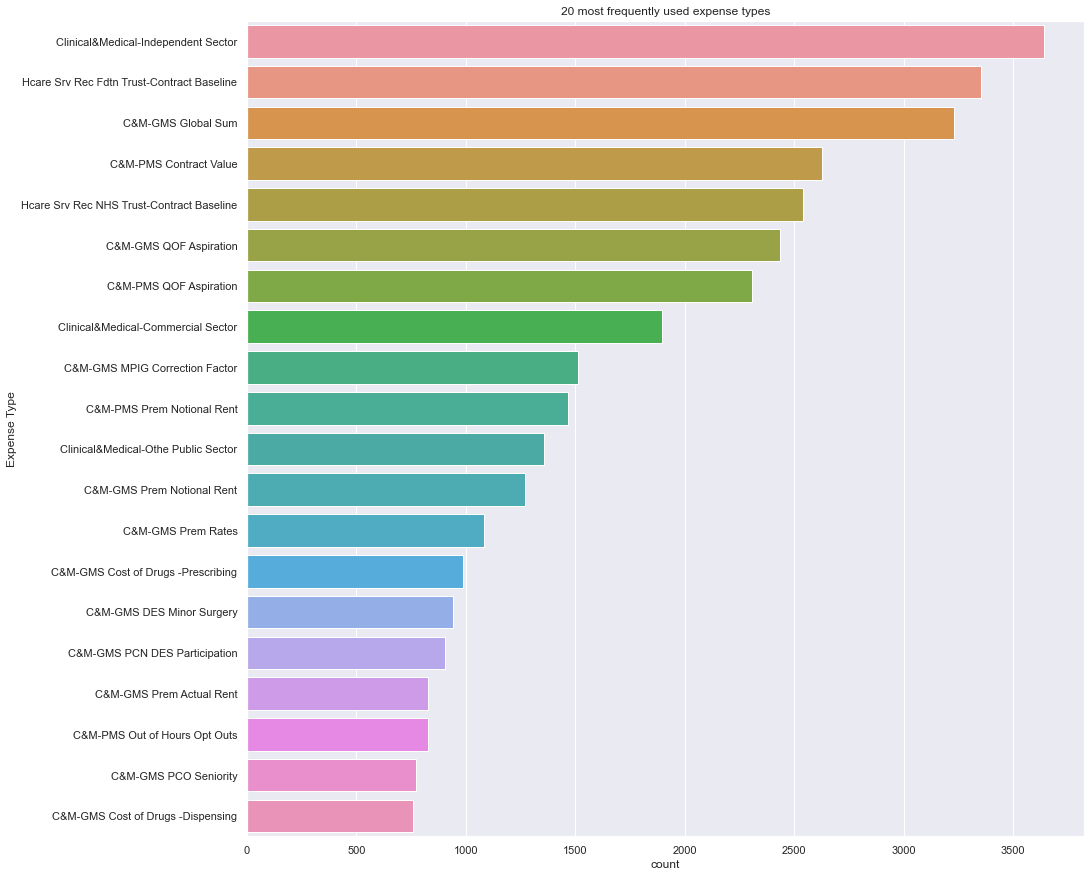

In [3]:
plt.figure(figsize = (15, 15))
sns.set()
sns.set(style = "darkgrid")
ax = sns.countplot(y = dataset['Expense Type'], 
                    data = dataset, 
                    order = dataset['Expense Type'].value_counts().iloc[:20].index)
ax.set_title('20 most frequently used expense types')
plt.show()

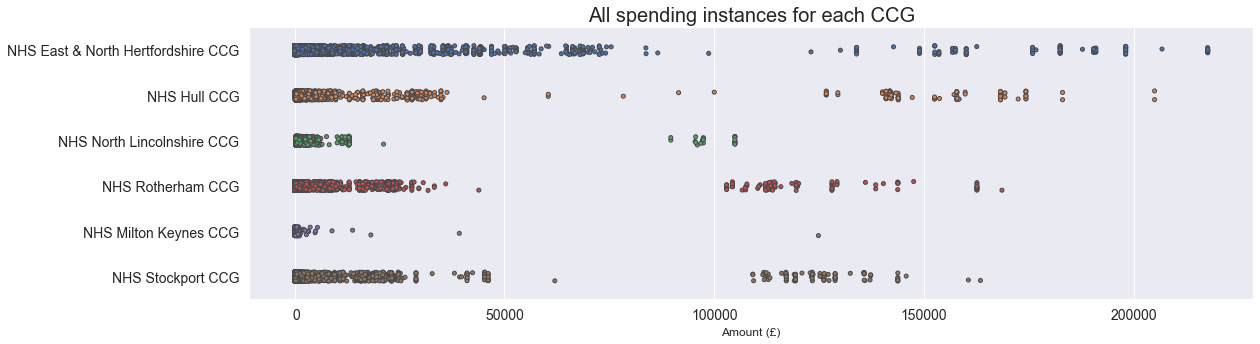

In [4]:
plt.figure(figsize = (18, 5))
ax2 = sns.stripplot(y="Entity", x="Amount", size = 4, data = dataset.loc[:, ['Entity', 'Amount']], linewidth = 1, jitter = True)
plt.setp(ax2.get_xticklabels(), fontsize = 14)
plt.setp(ax2.get_yticklabels(), fontsize = 14)
ax2.set_xticklabels(['{:2.0f}'.format(*[int(y) for y in divmod(x,100)]) for x in ax2.get_xticks()])
plt.xlabel('Amount (£)')
ax2.yaxis.label.set_visible(False)
plt.title('All spending instances for each CCG', fontsize=20)
plt.savefig('../Figures/stripplot.png')
plt.show()

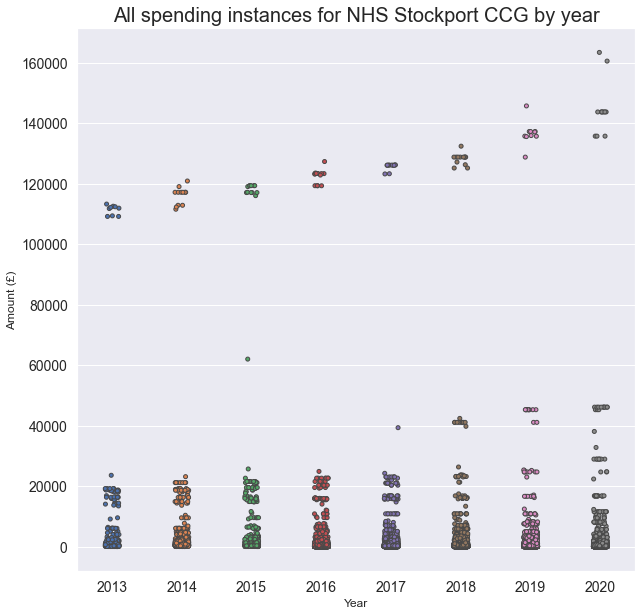

In [5]:
strip_data = dataset[dataset.Group == 'STKPRT'].loc[:,['Date','Amount']]
strip_data['Year'] = strip_data.Date.dt.year

plt.figure(figsize = (10, 10))
ax2 = sns.stripplot(x="Year", y="Amount", size = 4, data = strip_data, linewidth = 1, jitter = True)
plt.setp(ax2.get_xticklabels(), fontsize = 14)
plt.setp(ax2.get_yticklabels(), fontsize = 14)
ax2.set_yticklabels(['{:2.0f}'.format(*[int(x) for x in divmod(y,100)]) for y in ax2.get_yticks()])
plt.xlabel('Year')
plt.ylabel('Amount (£)')
plt.title('All spending instances for NHS Stockport CCG by year', fontsize=20)
plt.savefig('../Figures/stripplot Stockport yearly breakdown.png')
plt.show()

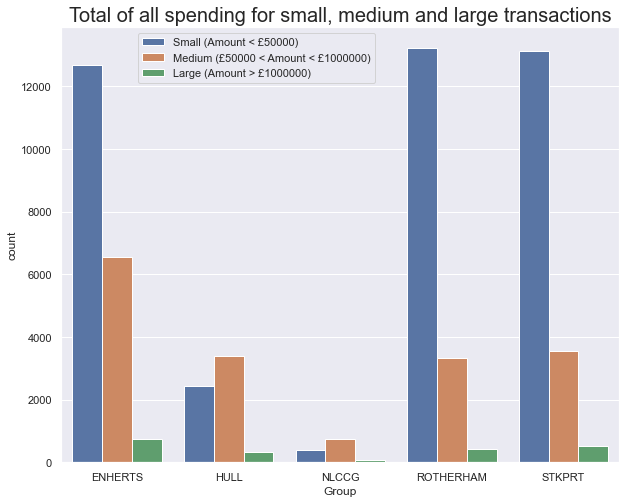

In [6]:
amount_type = lambda x:((0,1)[x > 50000],2)[x > 1000000]
dataset['Amount level'] = dataset['Amount'].apply(amount_type)

plt.figure(1, figsize = (10,8))
ax3 = sns.countplot(x = "Group", hue = "Amount level", data=dataset)
L = plt.legend(bbox_to_anchor = (0.35, 0.86))
L.get_texts()[0].set_text('Small (Amount < £50000)')
L.get_texts()[1].set_text('Medium (£50000 < Amount < £1000000)')
L.get_texts()[2].set_text('Large (Amount > £1000000)')
plt.savefig('../Figures/countplot.png')
plt.title('Total of all spending for small, medium and large transactions', fontsize=20)
plt.show()

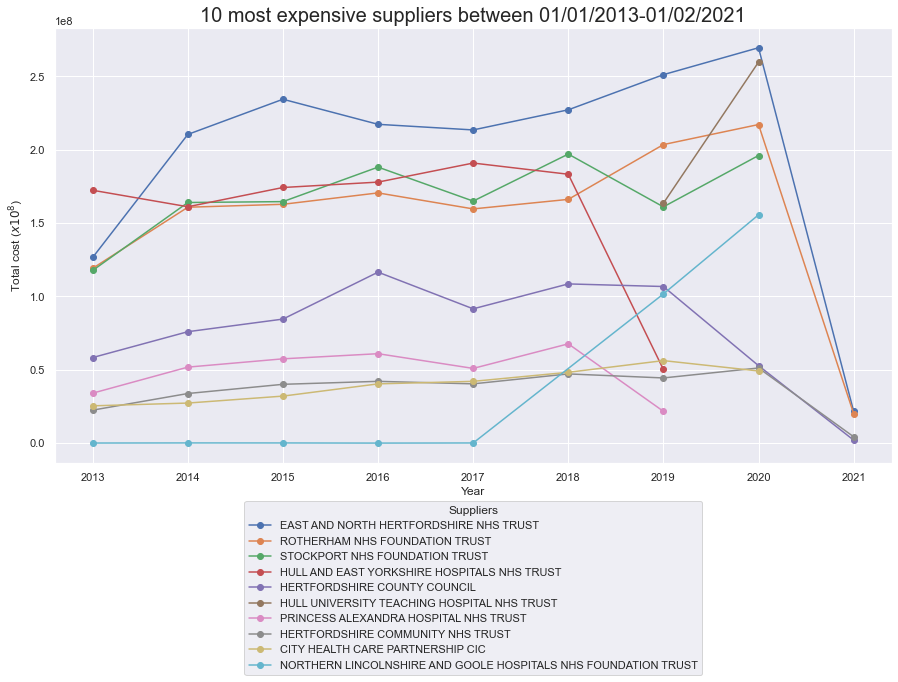

In [7]:
def get_total_amount(supplier):
    return {'name':supplier.name, 'total':supplier.sum(), 'count':supplier.count()}

def year_sums(supplier):
    return {'year':supplier.name, 'total':supplier.sum()}

sup_list = dataset['Amount'].groupby(dataset['Supplier']).apply(get_total_amount).unstack()
sup_list = sup_list.sort_values('total',ascending=False)

suppliers = sup_list.name.iloc[:10]

plt.figure(figsize=(15,8))
for supplier in suppliers:
    supp = dataset[dataset.Supplier == supplier]
    supp = supp['Amount'].groupby([supp['Date'].dt.strftime('%Y')]).apply(year_sums).unstack()
    plt.plot(supp.year, supp.total, 'o-', label=supplier)

plt.legend(title='Suppliers', bbox_to_anchor=(0.5, -0.5), loc='lower center')
plt.ylabel('Total cost ($x10^{8}$)')
plt.xlabel('Year')
plt.title('10 most expensive suppliers between 01/01/2013-01/02/2021', fontsize=20)
plt.show()

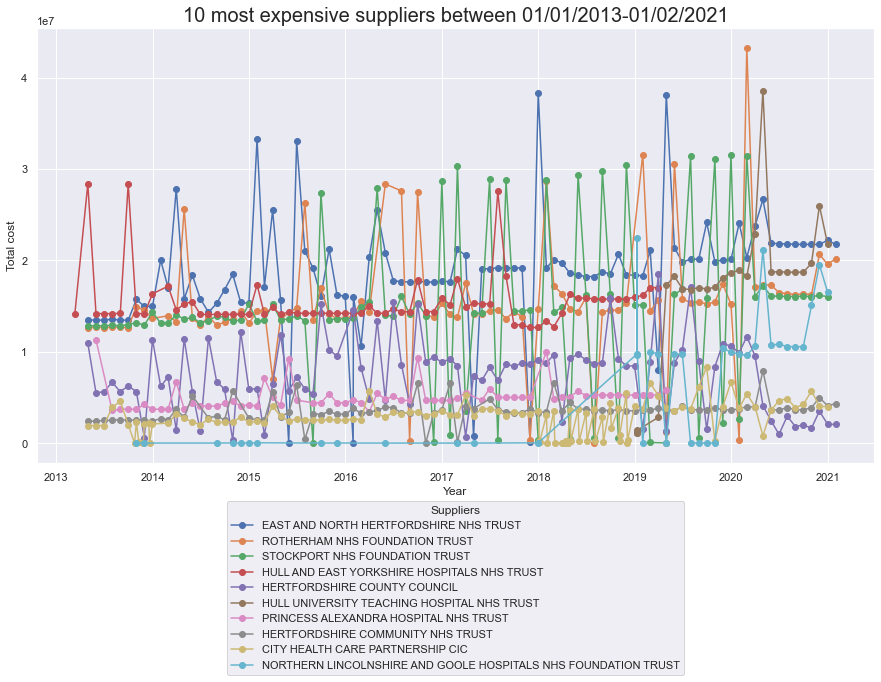

In [8]:
plt.figure(figsize=(15,8))
for supplier in suppliers:
    supp = dataset[dataset.Supplier == supplier]
    supp = supp['Amount'].groupby(supp.Date).apply(year_sums).unstack()
    plt.plot(supp.year, supp.total, 'o-', label=supplier)

plt.legend(title='Suppliers', bbox_to_anchor=(0.5, -0.5), loc='lower center')
plt.ylabel('Total cost')
plt.xlabel('Year')
plt.title('10 most expensive suppliers between 01/01/2013-01/02/2021', fontsize=20)
plt.show()

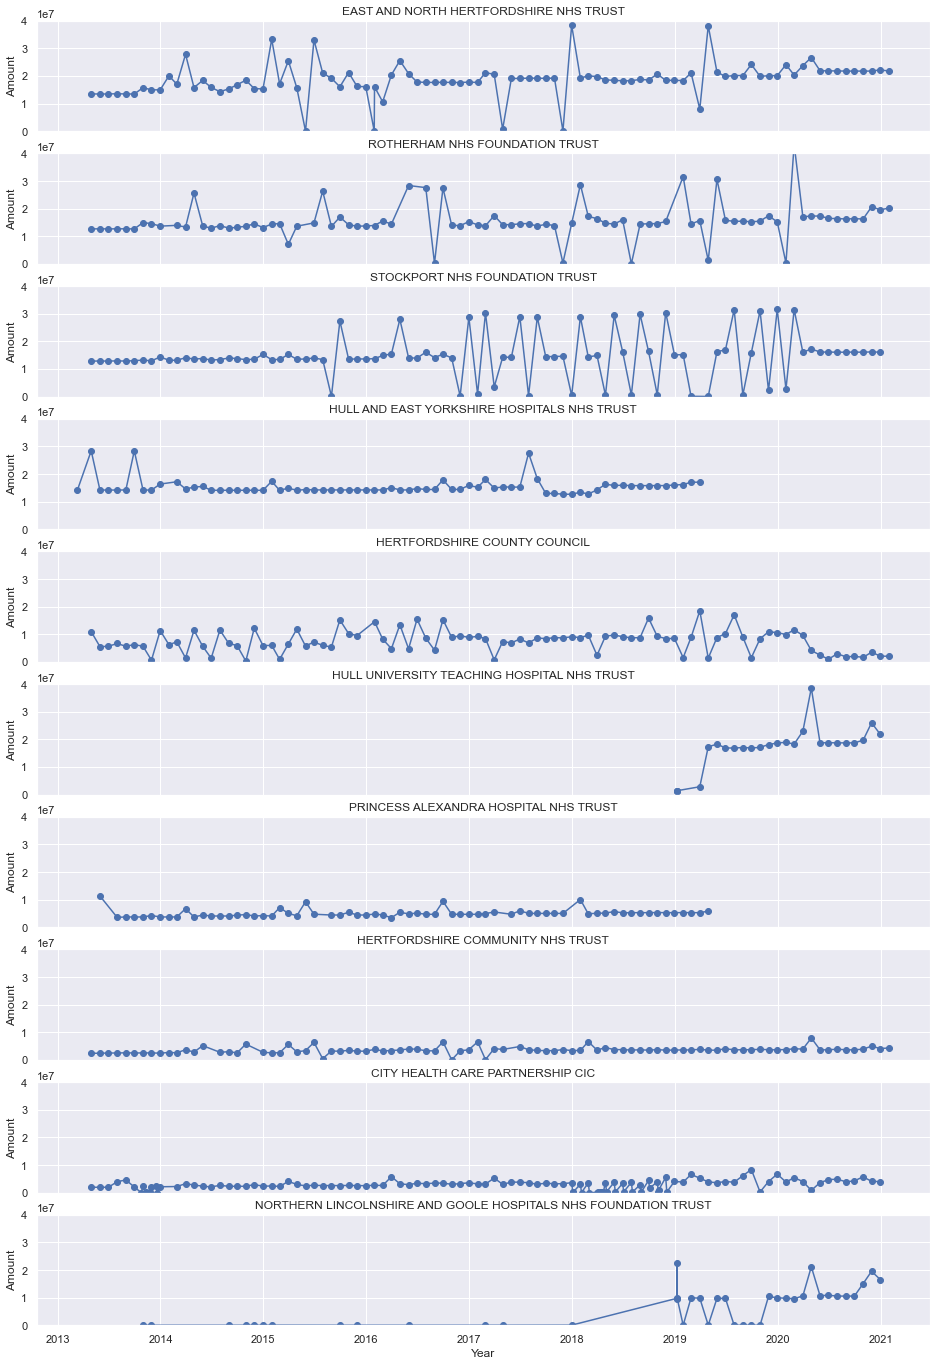

In [9]:
fig, axes = plt.subplots(10, sharex=True, figsize=(16,24))
fig.suptitle('')

axesIt = 0;

for supplier in suppliers:
    supp = dataset[dataset.Supplier == supplier]
    supp = supp['Amount'].groupby(supp.Date).apply(year_sums).unstack()
    axes[axesIt].plot(supp.year, supp.total, 'o-', label=supplier)
    axes[axesIt].set_title(supplier)
    axes[axesIt].set_ylim([-50, 40000000])
    axesIt = axesIt + 1
    
for ax in axes.flat:
    ax.set(xlabel='Year', ylabel='Amount')
    
for ax in axes.flat:
    ax.label_outer()
    
plt.savefig('../Figures/line graph subplots.png')

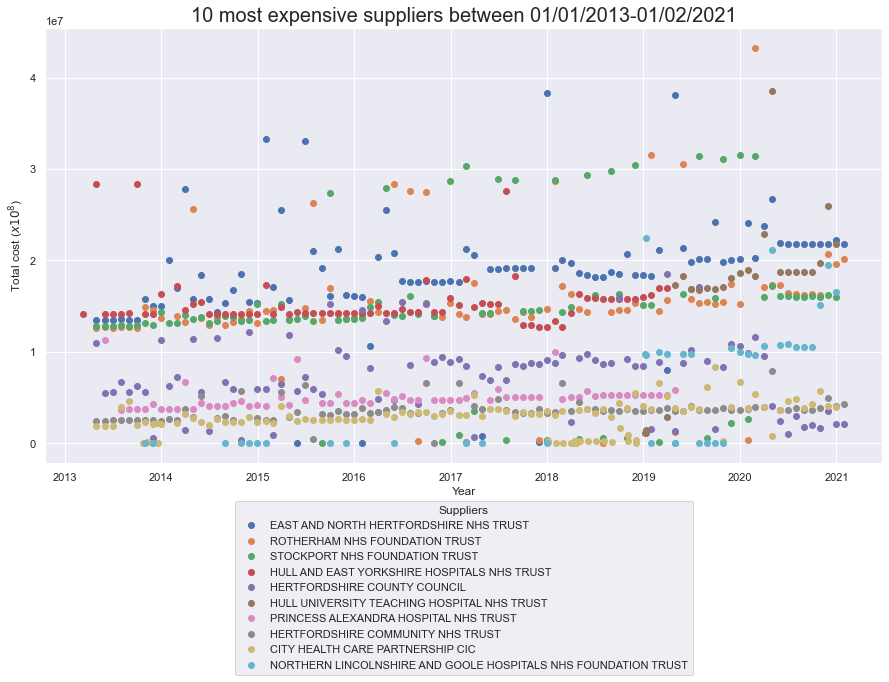

In [10]:
plt.figure(figsize=(15,8))
for supplier in suppliers:
    supp = dataset[dataset.Supplier == supplier]
    supp = supp['Amount'].groupby(supp.Date).apply(year_sums).unstack()
    plt.plot(supp.year, supp.total, 'o', label=supplier)

plt.legend(title='Suppliers', bbox_to_anchor=(0.5, -0.5), loc='lower center')
plt.ylabel('Total cost ($x10^{8}$)')
plt.xlabel('Year')
plt.title('10 most expensive suppliers between 01/01/2013-01/02/2021', fontsize=20)
plt.show()

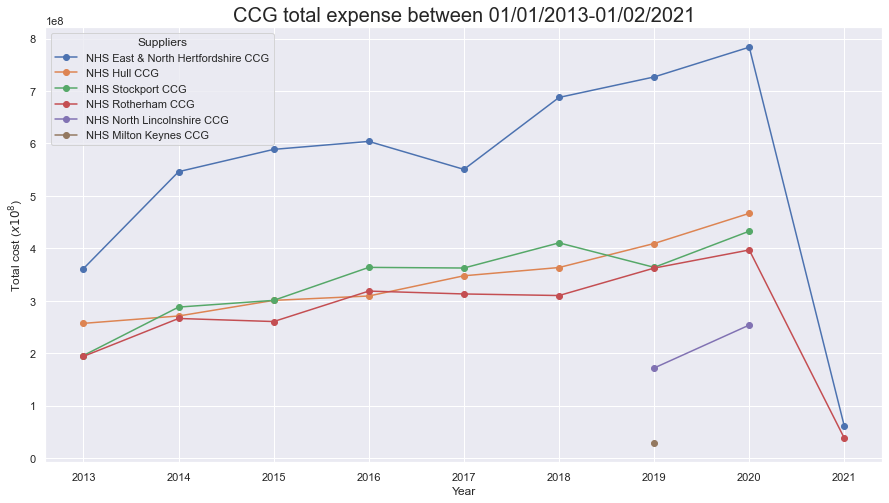

In [11]:
ccg_list = dataset['Amount'].groupby(dataset['Entity']).apply(get_total_amount).unstack()
ccg_list = ccg_list.sort_values('total',ascending=False)

ccgs = ccg_list.name

plt.figure(figsize=(15,8))
for ccg in ccgs:
    ccg_data = dataset[dataset.Entity == ccg]
    ccg_data = ccg_data['Amount'].groupby(ccg_data['Date'].dt.strftime('%Y')).apply(year_sums).unstack()
    plt.plot(ccg_data.year, ccg_data.total, 'o-', label=ccg)

plt.legend(title='Suppliers')
plt.ylabel('Total cost ($x10^{8}$)')
plt.xlabel('Year')
plt.title('CCG total expense between 01/01/2013-01/02/2021', fontsize=20)
plt.show()

In [12]:
print("Nb of suppliers: {}".format(len(dataset['Supplier'].unique())))

Nb of suppliers: 995


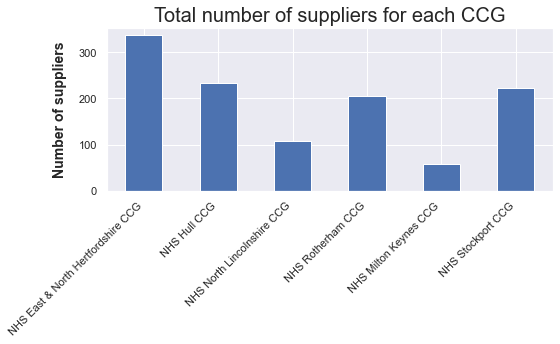

In [13]:
entitys = dataset.Entity.unique()

supplier_nb = dict()
for entity in entitys:
    liste_entity = dataset[dataset['Entity'] == entity]['Supplier'].unique()
    supplier_nb[entity] = len(liste_entity)
    
test_df = pd.DataFrame.from_dict(supplier_nb, orient='index')
test_df.rename(columns = {0:'count'}, inplace = True)
ax = test_df.plot(kind='bar', figsize = (8,3))
plt.ylabel('Number of suppliers', fontsize=14, weight = 'bold', labelpad=12)
plt.setp(ax.get_xticklabels(), fontsize=11, ha = 'right', rotation = 45)
ax.legend().set_visible(False)
plt.title('Total number of suppliers for each CCG', fontsize=20)
plt.show()

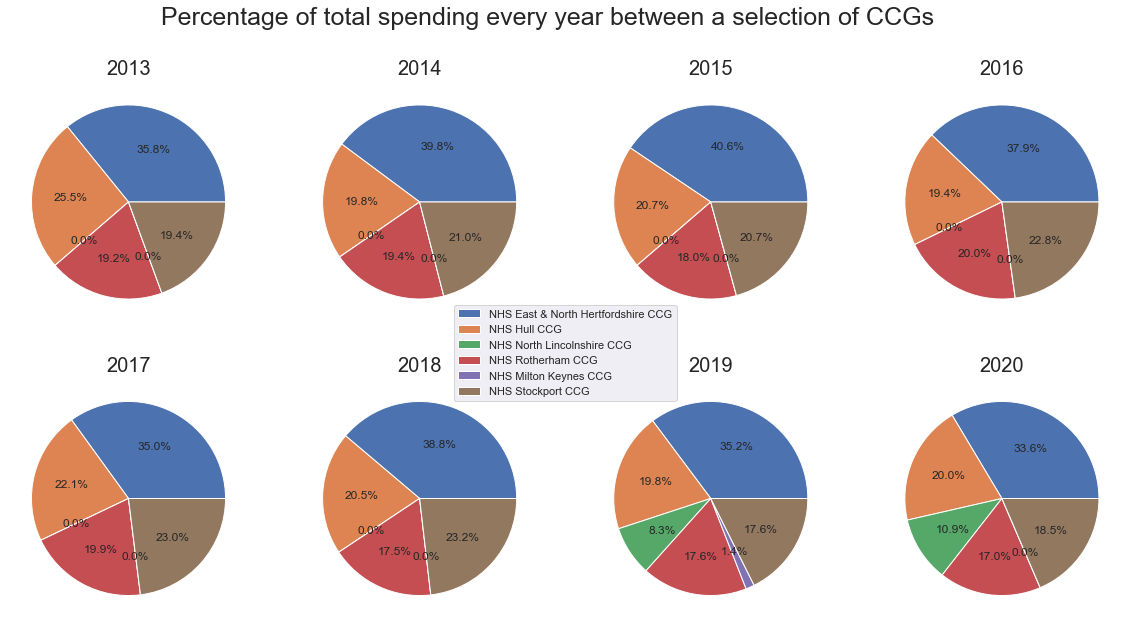

In [14]:
def get_total_per_year(ccg):
    return {'ccg':ccg.name, 'total':ccg.sum(), 'count':ccg.count()}

entities = dataset.Entity.unique()
years = [2013,2014,2015,2016,2017,2018,2019,2020]
ccg_list = {en:[] for en in entities};
for en in entities:
    ccg_temp = dataset[dataset['Entity']==en]
    ccg_list[en] = [ccg_temp[ccg_temp['Date'].dt.strftime('%Y')==str(year)].Amount.sum() for year in years]
ccg_year_total = pd.DataFrame(data=ccg_list)

plt.figure(figsize=(20,10))
plt.suptitle('Percentage of total spending every year between a selection of CCGs', fontsize=25)
for i in range(0,8):
    plt.subplot(2,4,i+1)
    plt.pie(ccg_year_total.iloc[i],autopct='%1.1f%%')
    plt.title(years[i],fontsize=20)
plt.legend(entities,bbox_to_anchor=(-1.3,1.1),loc='center')
plt.savefig('../Figures/yearly spend pie charts.png')
plt.show()

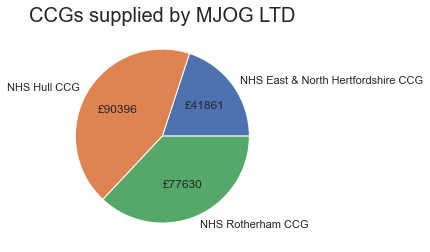

In [15]:
mjot_ltd_data = dataset[dataset.Supplier == 'MJOG LTD']
mjot_ltd_data_ccgs = mjot_ltd_data.Entity.unique()
mjot_ltd_data_sizes = np.array([])

for ccg in mjot_ltd_data_ccgs:
    mjot_ltd_data_sizes = np.append(mjot_ltd_data_sizes, mjot_ltd_data[mjot_ltd_data.Entity == ccg].Amount.sum())

def get_amount_label(percentage):
    amount = np.round(percentage/100.*mjot_ltd_data_sizes.sum(), 0)
    return "£{:.0f}".format(amount)
    
plt.figure()
plt.pie(mjot_ltd_data_sizes,labels = mjot_ltd_data_ccgs, autopct=get_amount_label)
plt.title('CCGs supplied by MJOG LTD', fontsize=20)
plt.show()

In [16]:
ccg_ld = pd.read_csv('../ccg_location_data.csv')
ccg_ld = ccg_ld.drop(['bng_e','bng_n','st_lengthshape','st_areashape'],axis = 1)
#ccg_ld.head()
ccg_ld[ccg_ld.ccg20nm == 'NHS East and North Hertfordshire CCG'] 

,objectid,ccg20cd,ccg20nm,long,lat
23,24,E38000049,NHS East and North Hertfordshire CCG,-0.08409,51.880711


In [17]:
import cartopy.crs as ccrs

eng_boundary = [2, -5.4, 56, 49.8]

plot_points_lon = eng_boundary[1] + 0.8
plot_points_lat = np.linspace(eng_boundary[2]-0.5,eng_boundary[3]+0.5,10).tolist()

def plot_ccg(entity):
    plt.plot(ccg_ld[ccg_ld.ccg20nm == entity].long,
             ccg_ld[ccg_ld.ccg20nm == entity].lat,
             marker = 'X', markersize = 12, 
             linestyle='None', transform=ccrs.Geodetic(), 
             label=entity)
    
def plot_feature(name, position, color):
    plt.plot(plot_points_lon, plot_points_lat[position],
             marker = 's', markersize = 24, linestyle='None',
             transform=ccrs.Geodetic(), color = color)
    plt.text(plot_points_lon-0.2, plot_points_lat[position]-0.1,
             name, ha='right', size='medium', color=color)
    
def plot_connection(entity, position, color, linestyle):
    plt.plot([plot_points_lon, ccg_ld[ccg_ld.ccg20nm == entity].long],
             [plot_points_lat[position], ccg_ld[ccg_ld.ccg20nm == entity].lat],
             linewidth = 4, alpha=0.75, transform=ccrs.PlateCarree(), color = color,
             linestyle = linestyle)

feature_count_positions = {
    1: [5],
    2: [2, 8],
    3: [2, 5, 8],
    4: [2, 4, 6, 8],
    5: [1, 3, 5, 7, 9]
}
feature_count_colours = ['r','g','b','m','c']
connection_line_style = ['-','--','-.',':','-']
    
def geoPlot(column_name, *feature_names):
    feature_count = len(feature_names)
    plt.figure(figsize=(10,10))
    ax = plt.axes(projection=ccrs.PlateCarree(),facecolor='white')
    ax.coastlines()
    
    all_ccgs = []
    for feature_it in range(feature_count):
        ax.set_extent(eng_boundary)
        connected_ccgs = dataset[dataset[column_name] == feature_names[feature_it]].Entity.unique()
        for ccg in connected_ccgs:
            if ccg not in all_ccgs: all_ccgs.append(ccg)

        for ccg in connected_ccgs: 
            plot_connection(ccg.replace('&', 'and'),
                            feature_count_positions[feature_count][feature_it],
                            feature_count_colours[feature_it],
                            connection_line_style[feature_it])
            
        plot_feature(feature_names[feature_it],
                     feature_count_positions[feature_count][feature_it],
                     feature_count_colours[feature_it])
    for ccg in all_ccgs:
        plot_ccg(ccg.replace('&', 'and'))
    plt.legend()
    

In [18]:
#print(dataset.Supplier.unique())
print(dataset['Expense Type'].unique())

['C&M-GMS Cost of Drugs -Dispensing' 'C&M-GMS PrscrptnChrgsColl&RmttdbyGP'
 'Hcare Srv Rec NHS Trust-Non Contract'
 'Hcare Srv Rec NHS Trust-Contract Baseline'
 'Hcare Srv Rec Fdtn Trust-Contract Baseline'
 'Clinical&Medical-Independent Sector'
 'Cont Care- Adult 100% Fully Funded' 'Miscellaneous Expenditure (L9)'
 'Furniture & Fittings' 'Cont Care-NHS Trust'
 'Hcare Srv Rec NHS Trust-Over/ Under Performance'
 'Clinical&Medical-Othe Public Sector'
 'Hcare Srv Rec Fdtn Trust-Non Contract' 'Computer Maintenance'
 'CHC Risk Pool Contribution' 'Hcare Srv Rec Fdtn Trust-Prior Year'
 'Clinical&Medical-Clinical Other'
 'Hcare Srv Rec Fdtn Trust-Over/ Under Performance'
 'Hcare Srv Rec Fdtn Trust-Contract Cost per Case'
 'Cont Care-FNC Client Continence Allow'
 'Cont Care-Funded Nursing Care Allow' 'Netwrkd assets(Owned)-Cost-Addns'
 'Computer Hardware Purch' 'Computer Software/License'
 'Other ICT Costs-IT Security Costs' 'External Consultancy Fees'
 'Cont Care- Children' 'Hcare Srv Rec NHS T

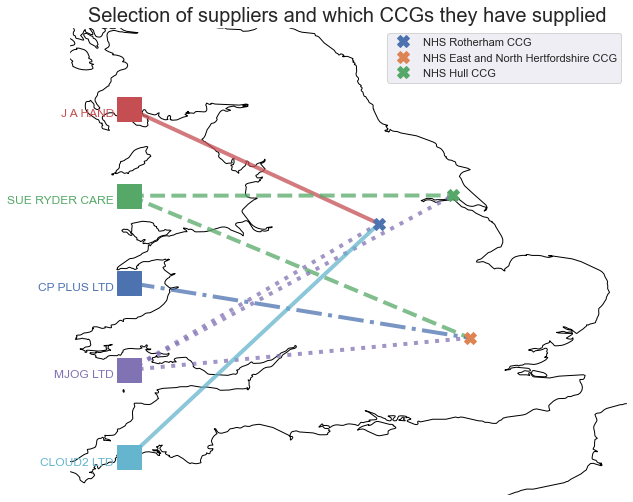

In [19]:
geoPlot('Supplier',
        'J A HAND',
        'SUE RYDER CARE',
        'CP PLUS LTD',
        'MJOG LTD',
        'CLOUD2 LTD'
        )
plt.title('Selection of suppliers and which CCGs they have supplied', fontsize=20)
plt.savefig('../Figures/geographic plot.png')
plt.show()

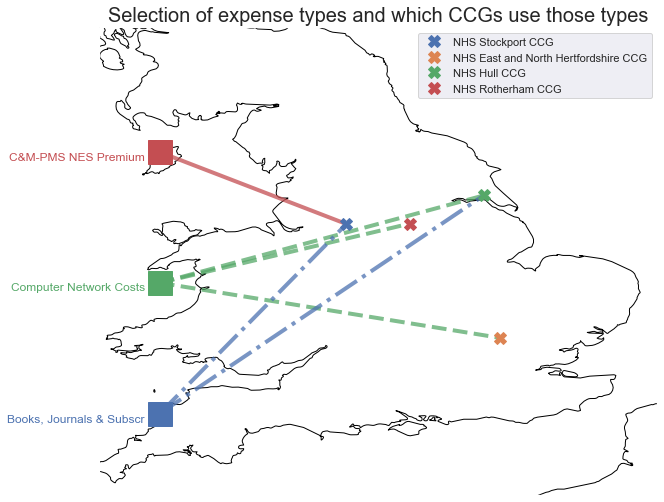

In [20]:
geoPlot('Expense Type',
        'C&M-PMS NES Premium',
        'Computer Network Costs',
        'Books, Journals & Subscr'
        )
plt.title('Selection of expense types and which CCGs use those types', fontsize=20)
plt.show()

In [67]:
import matplotlib.colors as colors

def activation_function(x, max_x):
    return max_x * ((x/max_x) ** (2/10))

def get_total_amount(data):
    return {'name':data.name, 'total':data.sum()}

def densePixelDisplay(feature, ccg_name, limit):
    # Find the list of names for the feature which will be used in the display
    # Sort by descending order
    names = dataset[dataset.Entity == ccg_name]['Amount'].groupby(dataset[feature]).apply(get_total_amount).unstack()
    names = names.sort_values('total',ascending=False).head(limit).name 
    total = len(names)
    names_ticks = list(range(total))

    # Find the range of years which the CCG has spending data for
    # Apply that range to the number of months which the data spans over
    years = np.sort(dataset[dataset.Entity == ccg_name].Date.dt.year.unique())
    years_lgth = len(years)
    months = [1,2,3,4,5,6,7,8,9,10,11,12]*(years_lgth)
    dates = len(months)
    dates_ticks = list(range(dates))

    Nr = total
    Nc = dates
    
    # Iterate though the range of months and each variable in the feature
    data = np.zeros((total,dates))
    for name_it in range(Nr):
        for mth in range(Nc):
            if (mth+1) % 12 == 0:
                _mth = 12
            else:
                _mth = (mth+1)%12

            data[name_it,mth] = dataset[dataset.Entity == ccg_name].loc[(dataset[feature] == names[name_it]) &
                                                                        (dataset.Date.dt.year == years[floor(mth/12)]) &
                                                                        (dataset.Date.dt.month == _mth)].Amount.sum()

    # Find the maximum amount value to be used in the activation function
    amount_max = data.max()
    # Pass each value through the activation function
    for nme in range(Nr):
        for mth in range(Nc):
            data[nme,mth] = activation_function(data[nme,mth],  data.max());
    
    # Plot the data in a matplotlib imshow figure
    plt.rcParams["axes.grid"] = False
    plt.figure(figsize=(20,20))
    ax = plt.axes()
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.imshow(data, cmap='Greys_r')
    plt.xticks(dates_ticks,months)
    year_xticks = np.linspace(4,(12*years_lgth)-8,years_lgth)
    for yr_it in range(len(years)):
        plt.text(year_xticks[yr_it],-3,years[yr_it])
    plt.yticks(names_ticks,names)
    plt.colorbar(label="Amount", orientation='horizontal', pad=0.03)
    ax.set_title('{} spend grouped by {}'.format(ccg_name, feature), fontsize=25, y=1.06)
    plt.savefig('../Figures/{} {} dense pixel CCG.png'.format(ccg_name,feature))
    plt.show()
    plt.rcParams["axes.grid"] = True

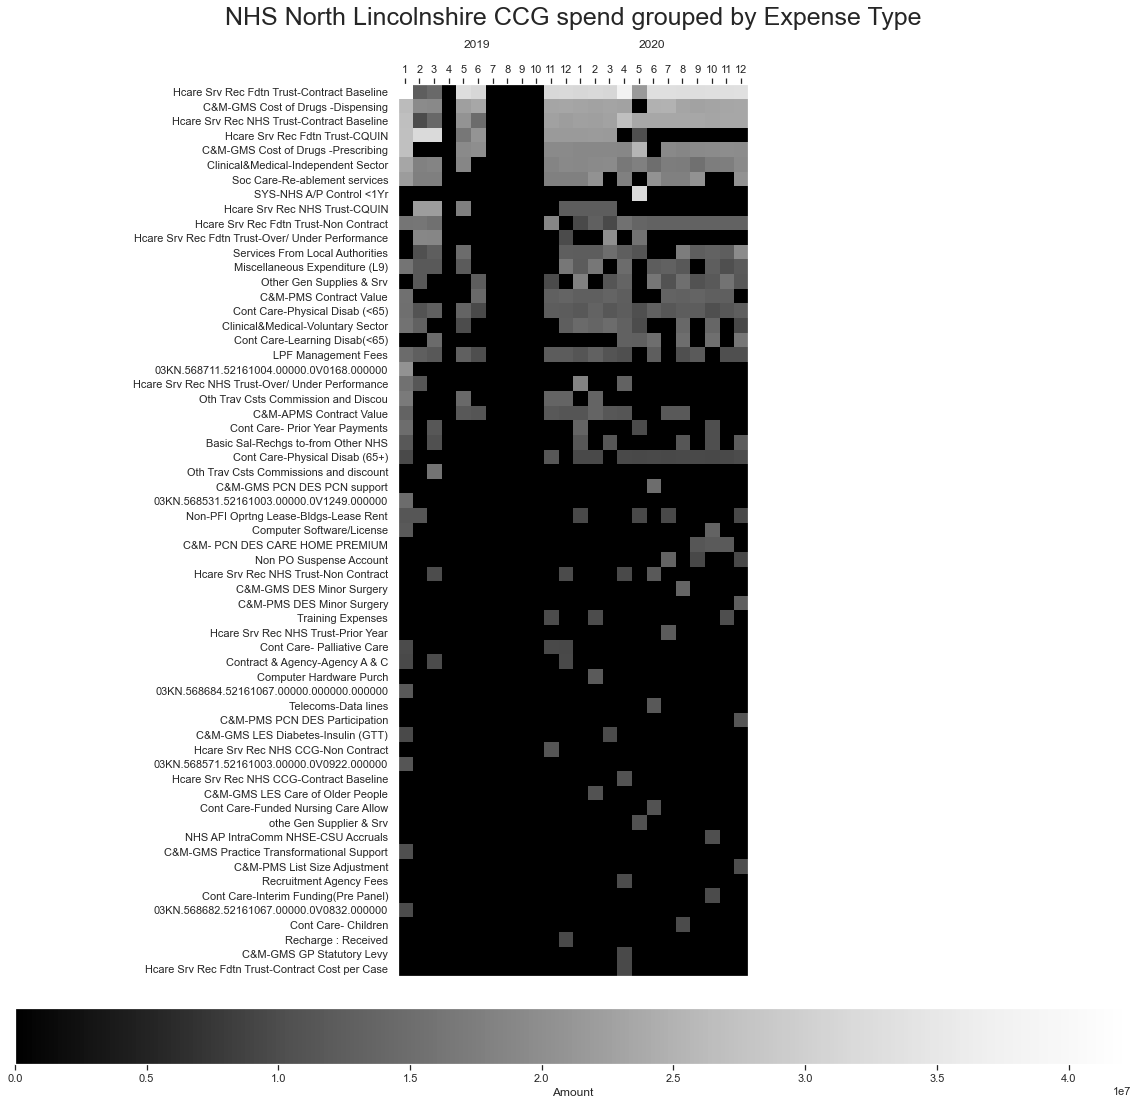

In [61]:
densePixelDisplay('Expense Type', 'NHS North Lincolnshire CCG', 100)

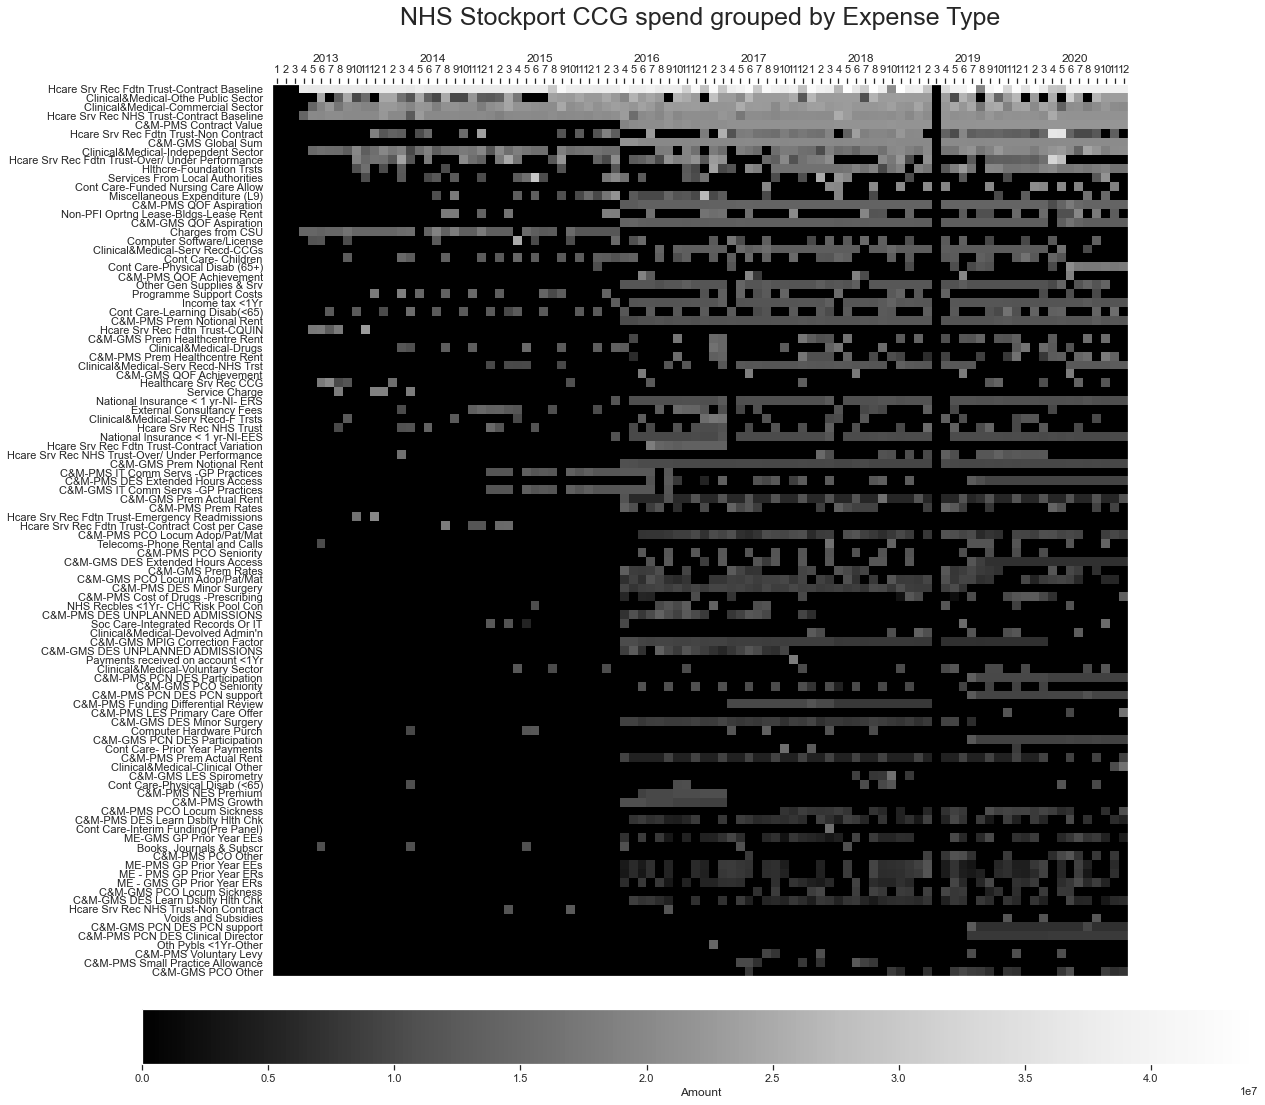

In [65]:
densePixelDisplay('Expense Type', 'NHS Stockport CCG', 100)

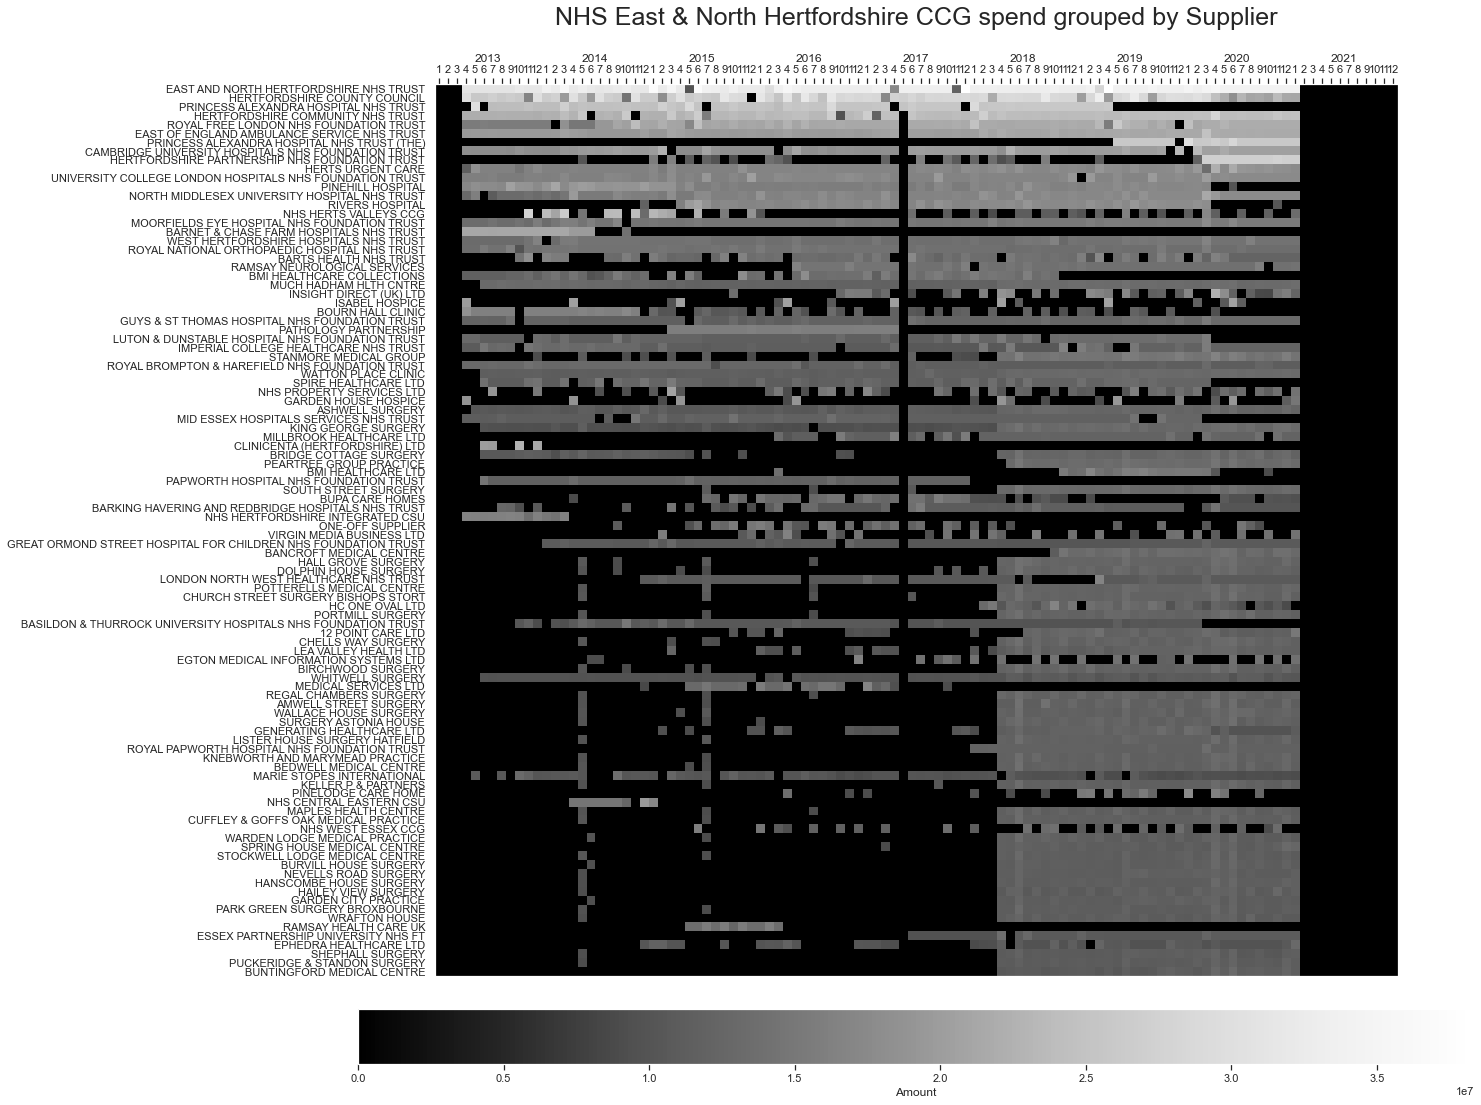

In [62]:
densePixelDisplay('Supplier', 'NHS East & North Hertfordshire CCG', 100)

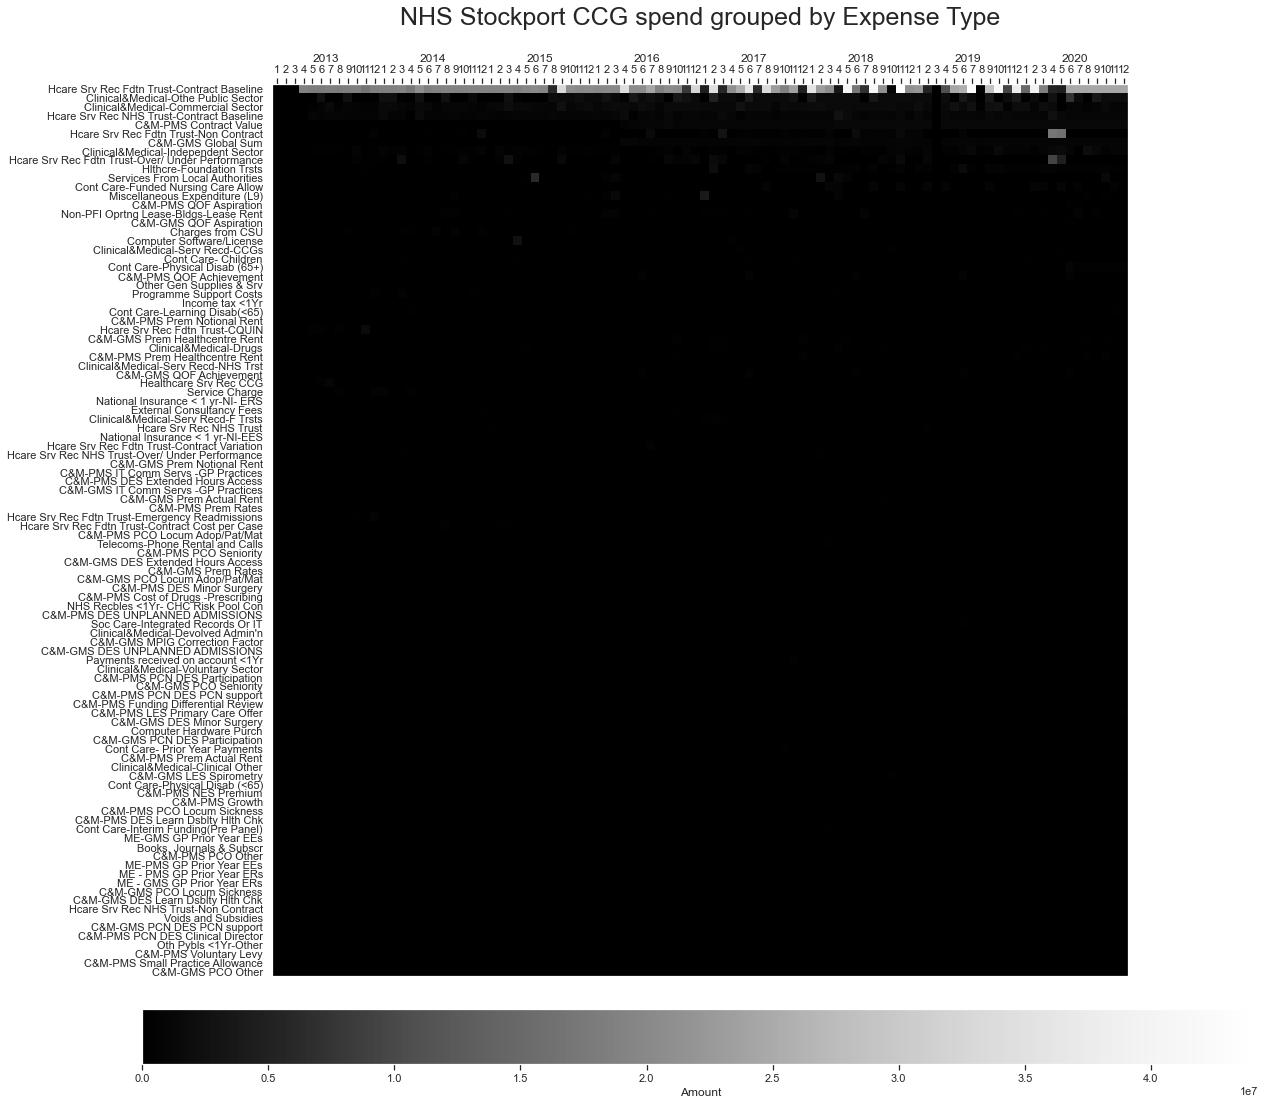

In [68]:
# No activation function
densePixelDisplay('Expense Type', 'NHS Stockport CCG', 100)

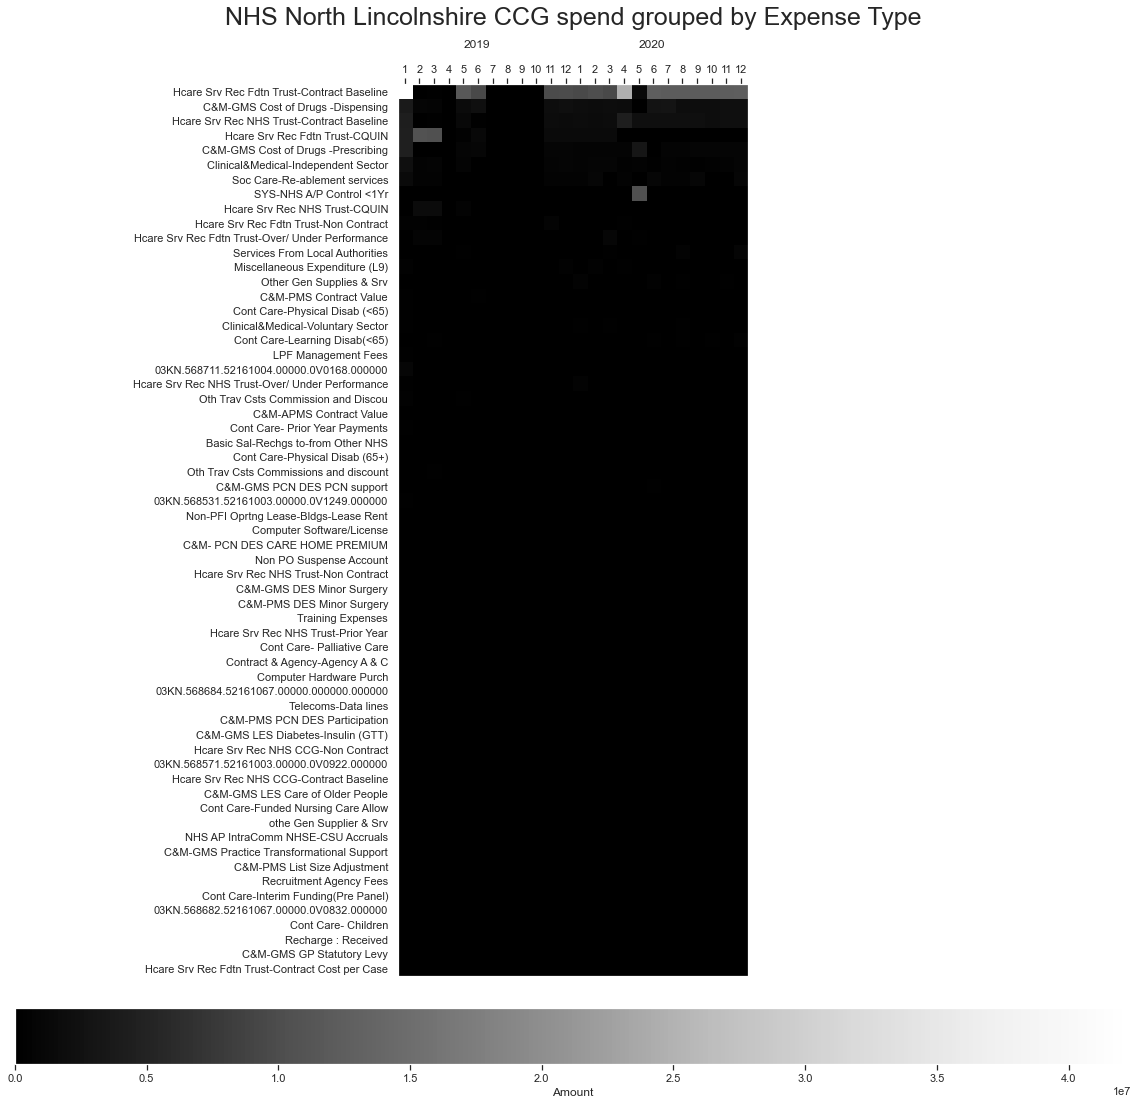

In [69]:
# No activation function
densePixelDisplay('Expense Type', 'NHS North Lincolnshire CCG', 100)

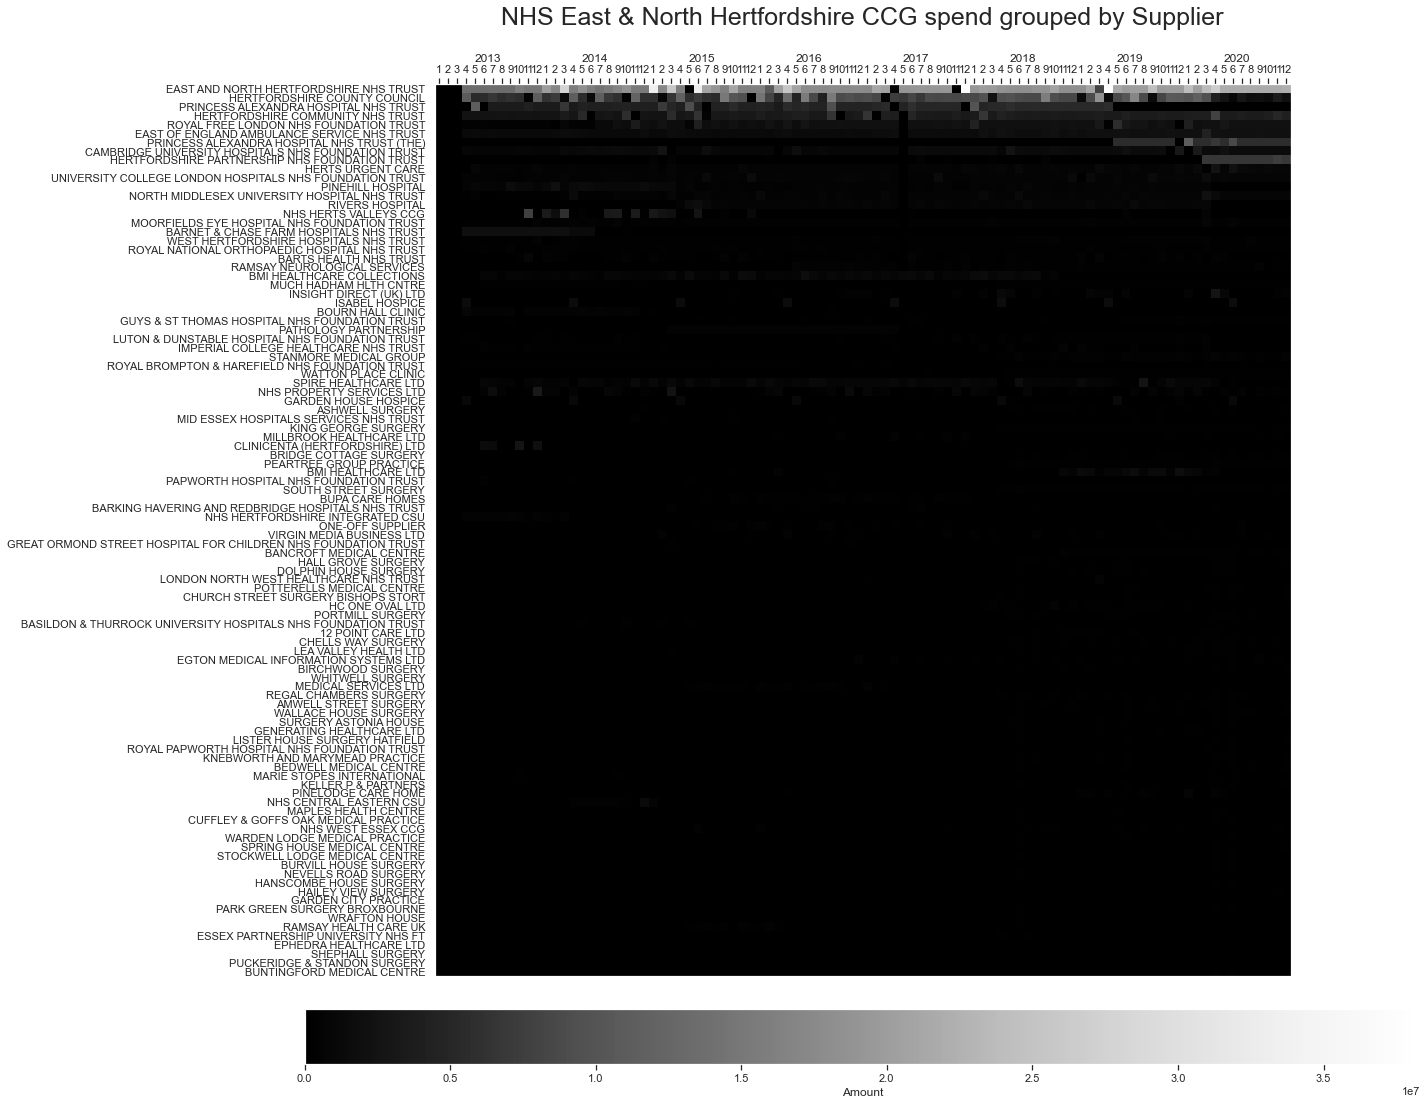

In [25]:
# No activation function
densePixelDisplay('Supplier', 'NHS East & North Hertfordshire CCG', 100)

In [28]:
test = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
for i in range(0, len(test)-1):
    test[i] = activation_function(test[i], 5)
print(test)

[0.0, 3.1547867224009662, 3.623898318388478, 3.930015427983114, 4.162766037009366, 4.352752816480621, 4.514402257237171, 4.655749575474188, 4.781762498950185, 4.895741811804884, 5]


In [44]:
years = np.sort(dataset.Date.dt.year.unique())
years[0]

2013